In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
from scipy.stats import pearsonr
from numpy import cov
import os
import sys

In [102]:
df = pd.read_csv("data.csv")

In [103]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [104]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [105]:
x = df.drop('diagnosis',axis = 1)
y = df['diagnosis']

In [106]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
y= lb.fit_transform(y)
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [107]:
# %matplotlib inline 
# from sklearn.linear_model import LinearRegression
# plt.xlabel('diagnosis')
# plt.ylabel('radius_mean')
# plt.scatter(df.diagnosis,df.radius_mean,color = 'red')
# reg = LinearRegression()
# reg.fit(df[['diagnosis']],df.radius_mean)
# plt.plot(df.diagnosis,reg.predict(df[['diagnosis']]),color = 'blue')

In [108]:
cor_matrix = np.cov(df['radius_mean'],df['texture_mean'])
print(cor_matrix)

[[12.41892013  4.90758156]
 [ 4.90758156 18.49890868]]


In [109]:
df.drop(['id','texture_mean','smoothness_mean','symmetry_mean','fractal_dimension_mean','texture_se','smoothness_se',
           'compactness_mean','radius_se','perimeter_se','area_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','fractal_dimension_se',
           'texture_worst','smoothness_worst','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst','Unnamed: 32'],axis = 1,inplace = True)
df

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,M,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,M,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,M,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,M,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,M,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,M,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,M,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,M,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


In [110]:

df
# df.drop('Unnamed: 32',axis = 1,inplace = True)



,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,M,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,M,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,M,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,M,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,M,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,M,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,M,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,M,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


In [111]:
df['diagnosis'] = lb.fit_transform(y)

                      diagnosis  radius_mean  perimeter_mean  area_mean   
diagnosis              1.000000     0.730029        0.742636   0.708984  \
radius_mean            0.730029     1.000000        0.997855   0.987357   
perimeter_mean         0.742636     0.997855        1.000000   0.986507   
area_mean              0.708984     0.987357        0.986507   1.000000   
concavity_mean         0.696360     0.676764        0.716136   0.685983   
concave points_mean    0.776614     0.822529        0.850977   0.823269   
radius_worst           0.776454     0.969539        0.969476   0.962746   
perimeter_worst        0.782914     0.965137        0.970387   0.959120   
area_worst             0.733825     0.941082        0.941550   0.959213   
concave points_worst   0.793566     0.744214        0.771241   0.722017   

                      concavity_mean  concave points_mean  radius_worst   
diagnosis                   0.696360             0.776614      0.776454  \
radius_mean             

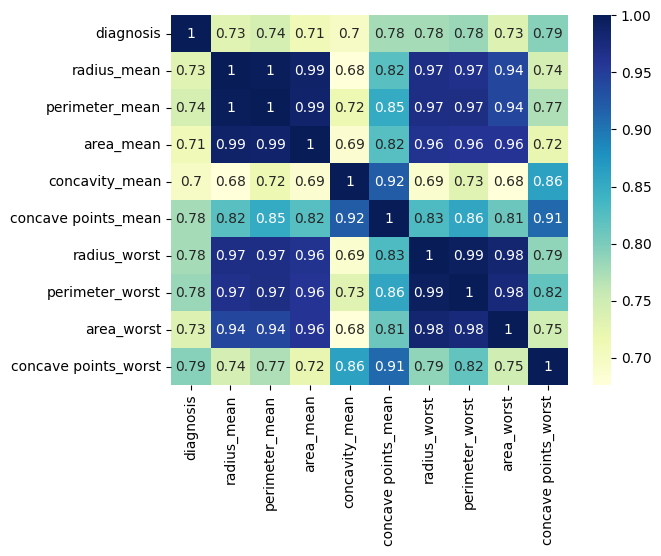

In [112]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [113]:
df

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,1,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,1,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


# logistic regression


In [114]:
x = df.drop('diagnosis' ,axis = 1)
y = df['diagnosis']
x


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,17.99,122.80,1001.0,0.30010,0.14710,25.380,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,24.990,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,23.570,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,14.910,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,22.540,152.20,1575.0,0.1625
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.2650


In [115]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,test_size = 0.2)

In [116]:
x_train.shape

(455, 9)

In [117]:
from sklearn.linear_model import LogisticRegression


In [118]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [119]:
y_pred1 = lr.predict(x_test)

lr.score(x_test,y_test)


0.9473684210526315

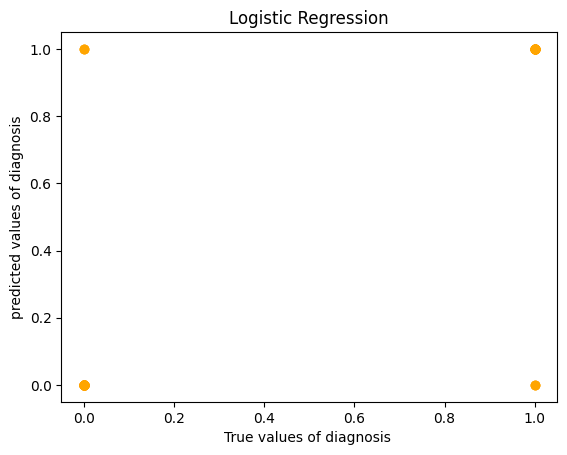

In [120]:
plt.scatter(y_pred1,y_test,color = 'orange')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("Logistic Regression")
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

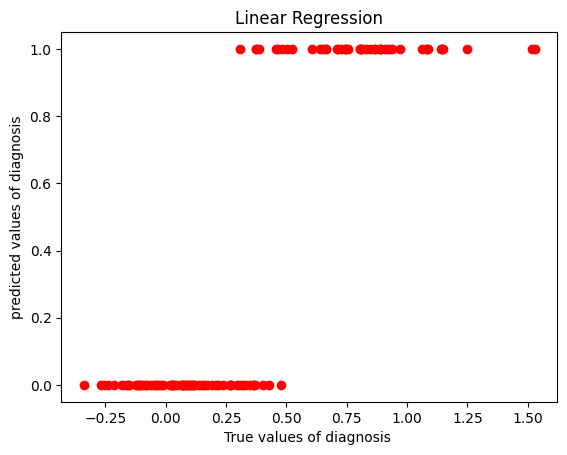

In [123]:
y_pred2 = model.predict(x_test)
plt.scatter(y_pred2,y_test,color = 'red')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("Linear Regression")

plt.show()

In [124]:
model.score(x_test,y_test)

0.7198632917807771

In [125]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


# random forest regression

In [126]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor(n_estimators = 100,random_state = 0)
rft.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [127]:
rft.score(x_test,y_test)

0.8722758335979677

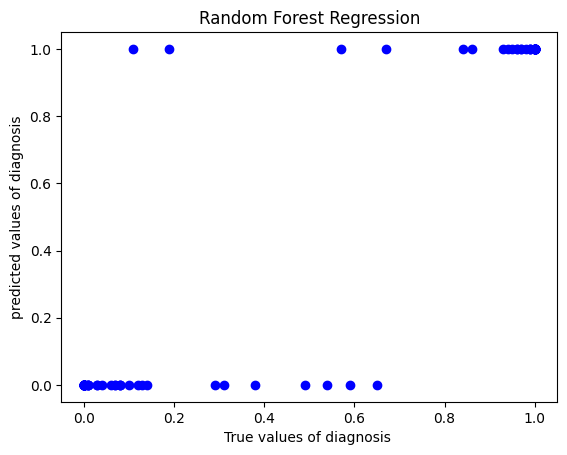

In [128]:
y_pred3 = rft.predict(x_test)
plt.scatter(y_pred3,y_test,color = 'blue')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("Random Forest Regression")

plt.show()

In [129]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


# Decision Tree Regression 

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
dfc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2)
dfc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

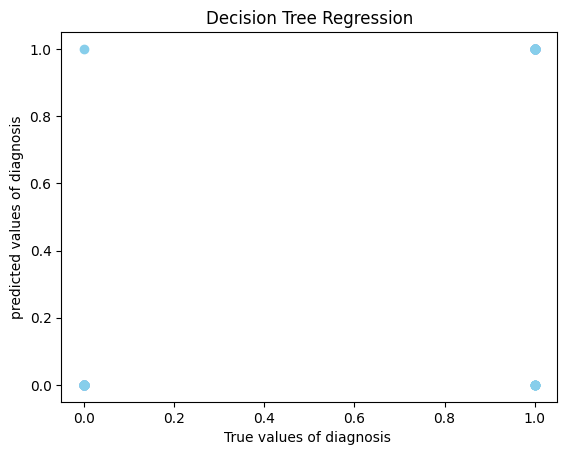

In [131]:
y_pred4 = dfc.predict(x_test)
plt.scatter(y_pred4,y_test,color = 'skyblue')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("Decision Tree Regression")

plt.show()

In [132]:
dfc.score(x_test,y_test)

0.9210526315789473

In [133]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


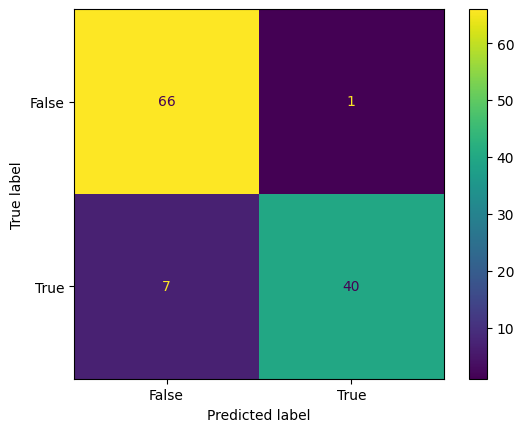

In [134]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 5,weights = 'uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [137]:
y_pred5 = knn.predict(x_test)

In [138]:
accuracy_score(y_test,y_pred)
knn.score(x_test,y_test)

0.9385964912280702

In [139]:
knn.get_params(deep = True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [140]:
knn.kneighbors(X=x_train, n_neighbors=5, return_distance=True)

(array([[ 0.        ,  8.73915571,  8.79073989, 10.50086689, 11.2326667 ],
        [ 0.        , 16.1935062 , 18.88426346, 19.93802647, 19.94980016],
        [ 0.        , 19.63973717, 28.59507335, 38.45310988, 45.88006174],
        ...,
        [ 0.        , 39.19302528, 55.11675835, 55.65370603, 55.83151914],
        [ 0.        , 25.46188949, 28.16618756, 29.23161733, 29.96502099],
        [ 0.        ,  5.03820692,  6.77271201,  7.88933904,  8.60697878]]),
 array([[  0, 352, 132, 194, 288],
        [  1, 120,  48, 405, 368],
        [  2, 133, 116, 136, 210],
        ...,
        [452,  17, 194, 293, 200],
        [453,  56, 164,  40,  93],
        [454, 305,  57, 424,  21]]))

In [141]:
k = knn.kneighbors_graph(X=x_train, n_neighbors=None, mode='connectivity')

In [142]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


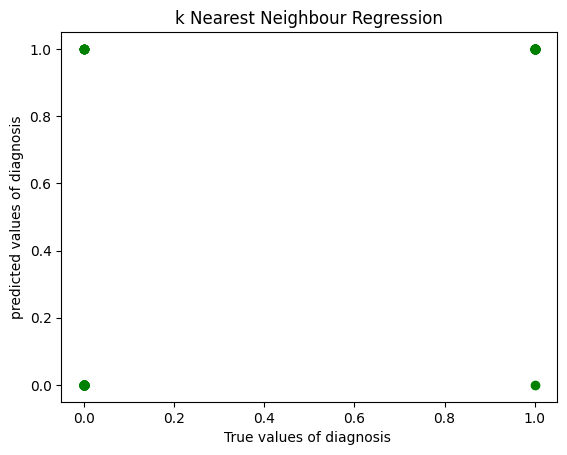

In [143]:
y_pred5 = knn.predict(x_test)
plt.scatter(y_pred,y_test,color = 'green')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("k Nearest Neighbour Regression")
plt.show()



In [144]:
k.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# KMeans 

In [145]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2,random_state = 0,n_init = "auto")
kmean.fit(x_train,x_test)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [146]:
kmean.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1], dtype=int32)

In [147]:
label = kmean.fit_predict(x_train)
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [148]:
kmean.get_feature_names_out(input_features = None)

array(['kmeans0', 'kmeans1'], dtype=object)

In [149]:
kmean.get_params(deep=True)

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

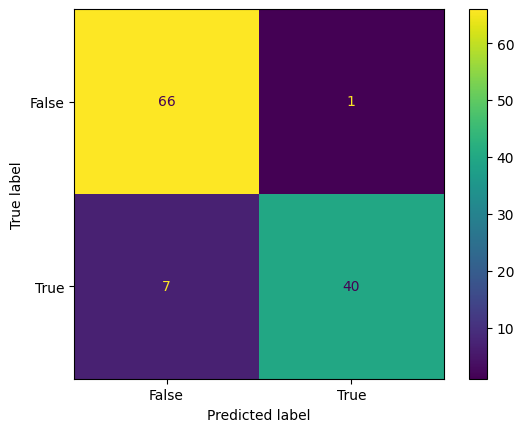

In [150]:
matrix = metrics.confusion_matrix(y_pred,y_test)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False, True])
display.plot()
plt.show()

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



# support vector machine 

In [152]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [153]:
classifier.score(x_test,y_test)

0.9298245614035088

In [154]:
y_pred = classifier.predict(x_test)


In [155]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


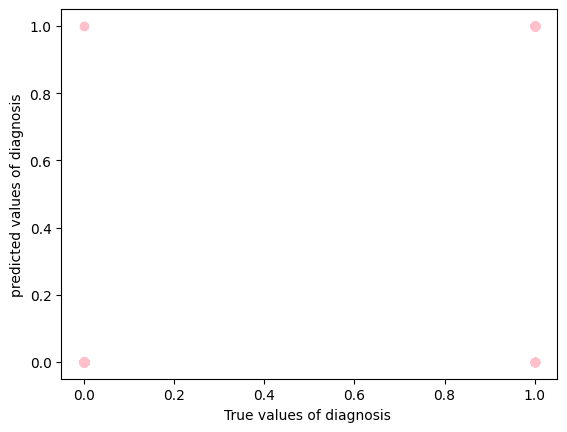

In [156]:
y_pred = classifier.predict(x_test)
plt.scatter(y_test,y_pred,color = 'pink')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.show()

# Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm


In [157]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [158]:
classifier.score(x_test,y_test)

0.9473684210526315

In [159]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.26490647141300877


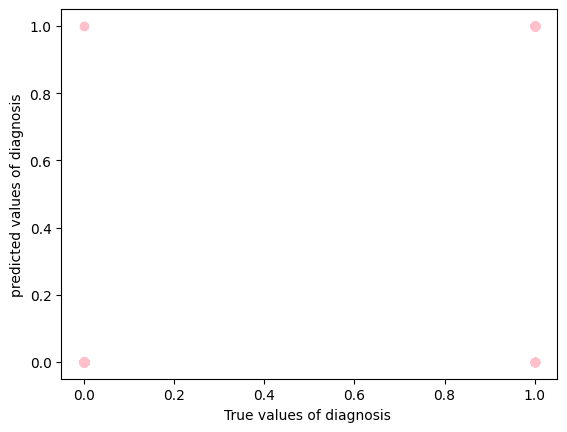

In [160]:

plt.scatter(y_test,y_pred,color = 'pink')
plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.show()

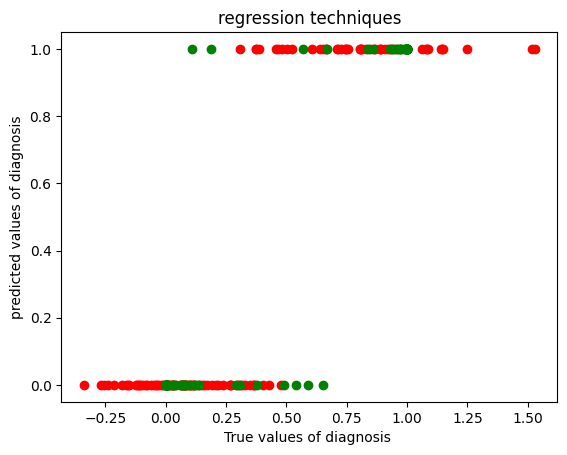

In [161]:

y_pred1 = lr.predict(x_test)
y_pred2 = model.predict(x_test)
y_pred3 = rft.predict(x_test)
y_pred4 = dfc.predict(x_test)
y_pred5 = knn.predict(x_test)

# plt.scatter(y_pred1,y_test,color = 'orange',label = 'logistic_r')
plt.scatter(y_pred2,y_test,color = 'red',label = 'linear_r')
plt.scatter(y_pred3,y_test,color = 'green',label = 'random_f')
# plt.scatter(y_pred4,y_test,color = 'blue',label = 'decision_t')
# plt.scatter(y_pred5,y_test,color = 'pink',label = 'knn')


plt.xlabel("True values of diagnosis ")
plt.ylabel("predicted values of diagnosis")
plt.title("regression techniques")
plt.show()




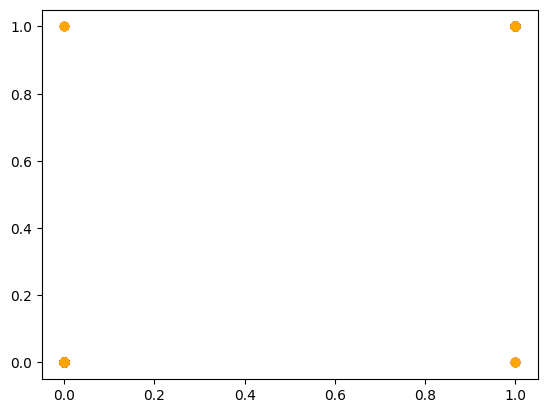

In [162]:
plt.scatter(y_pred4,y_test,color = 'blue',label = 'decision_t')
plt.scatter(y_pred5,y_test,color = 'pink',label = 'knn')
plt.scatter(y_pred1,y_test,color = 'orange',label = 'logistic_r')
plt.show()


In [163]:
x_train.shape

(455, 9)

In [195]:
x_train

array([[-1.15036482, -1.12855021, -0.95876358, ..., -1.0360446 ,
        -0.84880771, -0.75798367],
       [-0.93798972, -0.94820146, -0.82152548, ..., -0.68992205,
        -0.66869703, -0.60687023],
       [ 0.574121  ,  0.51394098,  0.40858627, ...,  0.26213665,
         0.11388819, -0.02371948],
       ...,
       [-1.32422924, -1.31754581, -1.04876494, ..., -0.92342915,
        -0.75388682, -0.97974953],
       [-1.24380987, -1.28007609, -1.02221174, ..., -1.32364258,
        -0.98572598, -1.75401433],
       [-0.73694129, -0.71226578, -0.69966029, ..., -0.73159863,
        -0.69481734, -0.27460457]])

# Artificial Neural Network

In [296]:
from tensorflow import keras
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout

In [297]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [298]:
x_train

array([[-1.15036482, -1.12855021, -0.95876358, ..., -1.0360446 ,
        -0.84880771, -0.75798367],
       [-0.93798972, -0.94820146, -0.82152548, ..., -0.68992205,
        -0.66869703, -0.60687023],
       [ 0.574121  ,  0.51394098,  0.40858627, ...,  0.26213665,
         0.11388819, -0.02371948],
       ...,
       [-1.32422924, -1.31754581, -1.04876494, ..., -0.92342915,
        -0.75388682, -0.97974953],
       [-1.24380987, -1.28007609, -1.02221174, ..., -1.32364258,
        -0.98572598, -1.75401433],
       [-0.73694129, -0.71226578, -0.69966029, ..., -0.73159863,
        -0.69481734, -0.27460457]])

In [299]:
y_train

338    0
427    0
406    0
96     0
490    0
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 455, dtype: int64

In [300]:
classifier = Sequential()

#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=9))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [301]:
classifier.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 9)                 90        
                                                                 
 dense_137 (Dense)           (None, 9)                 90        
                                                                 
 dense_138 (Dense)           (None, 1)                 10        
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [302]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 1.0797 - accuracy: 0.3165
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0117 - accuracy: 0.3538
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.9485 - accuracy: 0.5319
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8919 - accuracy: 0.6264
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.8401 - accuracy: 0.6396
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7946 - accuracy: 0.6462
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.6527
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.7183 - accuracy: 0.6571
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6637
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6747
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9473
Epoch 85/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9473
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.9473
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1454 - accuracy: 0.9473
Epoch 88/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9473
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9473
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1437 - accuracy: 0.9473
Epoch 91/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1432 - accuracy: 0.9473
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9473
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9451
Epoch 94/100
5/5 [===============

In [303]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape = (None,9)),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(8,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
    
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
    

model.fit(x_train,y_train,epochs= 100)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5670
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.7714
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6266 - accuracy: 0.7890
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.8330
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.8440
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8505
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8549
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8615
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8681
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8769
Epoch 11/

Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1042 - accuracy: 0.9692
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9714
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9714
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9736
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1032 - accuracy: 0.9714
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1035 - accuracy: 0.9670
Epoch 89/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9714
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9714
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9714
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9670


In [304]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, None, 1)           10        
                                                                 
 dense_140 (Dense)           (None, None, 32)          64        
                                                                 
 dense_141 (Dense)           (None, None, 16)          528       
                                                                 
 dense_142 (Dense)           (None, None, 8)           136       
                                                                 
 dense_143 (Dense)           (None, None, 1)           9         
                                                                 
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


In [305]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

4/4 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [306]:
k = print(y_pred > 0.5)

[[ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 

In [307]:
y_pred= lb.fit_transform(y_pred)
x_test

/home/gupta/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.20175604, -0.13086754, -0.27145506, ...,  0.18528621,
        -0.06280808,  1.3893291 ],
       [-0.25555773, -0.31780437, -0.32400244, ..., -0.4652823 ,
        -0.42388306, -0.83369364],
       [-0.02619262, -0.09175081, -0.13226041, ..., -0.31039911,
        -0.32827929, -0.49483785],
       ...,
       [ 1.71811488,  1.7286186 ,  1.66636924, ...,  1.15182826,
         1.02058759,  1.57630515],
       [ 1.18859296,  1.19333694,  1.11294474, ...,  1.03950839,
         1.04448854,  0.56019755],
       [ 0.26263752,  0.28459338,  0.09945116, ...,  0.07887791,
        -0.04146795, -0.19383705]])

In [308]:
loss, accuracy = model.evaluate(x_test, y_test)
# print('Test accuracy:', accuracy)
accuracy
loss

4/4 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9298


0.14773787558078766

In [309]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[[62  5]
 [ 3 44]]


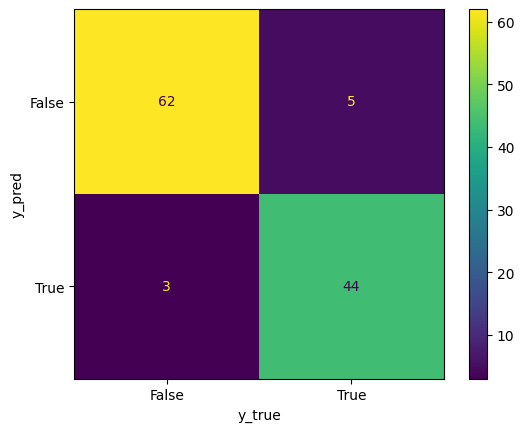

In [310]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False,True])
display.plot()
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.show()

In [311]:
from sklearn.metrics import classification_report 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9714
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9736
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9714
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9714
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9714
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9736
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9736
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9736
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9736
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0999 - accuracy: 0.9714
Epoch 11/

Epoch 83/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 0.9758
Epoch 84/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0943 - accuracy: 0.9758
Epoch 85/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 0.9758
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9758
Epoch 87/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 0.9758
Epoch 88/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9758
Epoch 89/100
15/15 [==============================] - 0s 981us/step - loss: 0.0937 - accuracy: 0.9758
Epoch 90/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9758
Epoch 91/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9758
Epoch 92/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.973

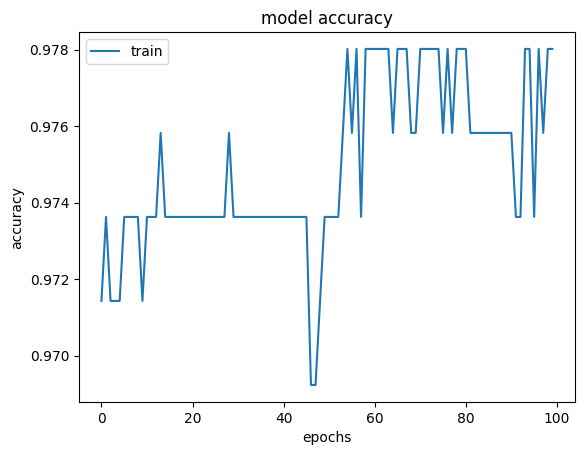

In [312]:
classifier = model.fit(x_train,y_train,epochs= 100)

print(classifier.history.keys())
plt.plot(classifier.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

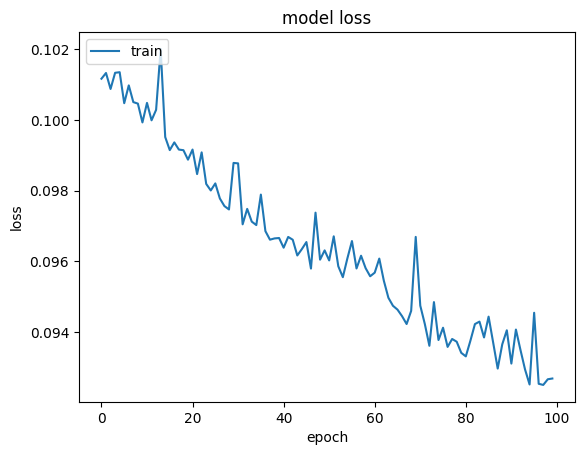

In [313]:
plt.plot(classifier.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()